In [19]:
!pip3 install yfinance
!pip3 install prophet
!pip3 install deap
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.5-py3-none-macosx_11_0_arm64.whl (8.2 MB)
  Using cached holidays-0.48-py3-none-any.whl (1.0 MB)
  Using cached cmdstanpy-1.2.2-py3-none-any.whl (94 kB)
     |████████████████████████████████| 78 kB 5.9 MB/s eta 0:00:011
  Using cached stanio-0.5.0-py3-none-any.whl (8.0 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:


import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming 'returns' DataFrame contains historical returns for each stock

# Step 1: Prepare the data for Facebook Prophet
# Reset index to make 'Date' a column
returns.reset_index(inplace=True)

# Prophet expects the column names to be 'ds' and 'y'
returns.columns = ['ds'] + returns.columns[1:].tolist()

# Get current date and calculate 3 years from now
today = datetime.today()
future_date = today + pd.DateOffset(years=3)

# Step 2: Train the Prophet model and make future projections
projected_returns = pd.DataFrame({'ds': pd.date_range(start=today, end=future_date)})  # Next 3 years
for column in returns.columns[1:]:
    # Train Prophet model
    model = Prophet()
    model.fit(returns[['ds', column]])

    # Make future projections
    future = model.make_future_dataframe(periods=1095)  # 3 years
    forecast = model.predict(future)

    # Extract projected returns
    projected_returns[column] = forecast['yhat']

# Step 3: Create a projected returns DataFrame

# Step 4: Perform segmentation on the historical and projected returns
# You can use the same segmentation approach as before

# Step 5: Plot the historical and projected values for the selected efficient stock
# For this, you can select one of the stocks from the efficient segment and plot its historical and projected returns

# Example plot for historical and projected returns of a selected stock
selected_stock = 'AAPL'  # Example: Apple stock
plt.figure(figsize=(10, 6))
plt.plot(returns['ds'], returns[selected_stock], label='Historical Returns', color='blue')
plt.plot(projected_returns['ds'], projected_returns[selected_stock], label='Projected Returns', color='red')
plt.title(f'Historical vs Projected Returns for {selected_stock}')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

Defaulting to user installation because normal site-packages is not writeable
  Using cached deap-1.4.1.tar.gz (1.1 MB)
  Created wheel for deap: filename=deap-1.4.1-cp39-cp39-macosx_10_9_universal2.whl size=111825 sha256=711346af5c42652797fee40eced082ff682ac8d47cf94d0daf38847a2a09e071
  Stored in directory: /Users/fbarahona/Library/Caches/pip/wheels/d9/58/fd/a64ce13f5e2324689e8bc1857c9562d53020d96cc88f5bf787
Successfully built deap
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 69.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 42.7 MB/s eta 0:00:01
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
     |████████████████████████████████| 66 kB 10.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [324]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import numpy as np
import seaborn as sns
from deap import base, creator, tools, algorithms
import pickle
from datetime import timedelta

class Portfolio:
    def print_portfolio_details(self):
        print(f"Portfolio Name: {self.get_name()}")
        print(f"Average Return Rate: {self.calculate_portfolio_return() * 100:.2f}%")
        print(f"Sharpe Ratio: {self.calculate_sharpe_ratio():.2f}")
        print("Weights per Symbol:")
        for symbol, weight in zip(self.symbols, self.weights):
            if weight>0:
                print(f"{symbol}: {weight * 100:.2f}%")
        self.efficient_frontier()
    def print_dataframes(self):
        # Convert avg_returns and weights to DataFrames
        df_avg_returns = pd.DataFrame(self.avg_returns, columns=['Avg_Return'])
        df_weights = pd.DataFrame({'Weights': self.weights})

        # Concatenate the DataFrames horizontally
        df_combined = pd.concat([df_avg_returns, df_weights], axis=1)

        # Print the combined DataFrame
        print("Combined DataFrame:")
        print(df_combined)
        print(self.avg_returns)
        print(self.weights)
        print(sum(self.weights))
    def set_name(self,name):
        self.name =name
    def get_name(self):
        return self.name
    def set_market_data(self, market_data):
        self.market_data = market_data
        data_close=self.market_data.transpose().dropna().transpose()
        self.avg_returns = returns = np.log(data_close / data_close.shift(1)) #self.market_data[self.symbols].pct_change().mean()
        self.assign_weights_markowitz()
        self.portfolio_return = np.dot(self.avg_returns, self.weights)


    def __init__(self,market_data, symbols):
        self.symbols = symbols

        self.set_market_data(market_data)


    def assign_weights_markowitz(self,  population_size=50, num_generations=100):
      returns_data=self.avg_returns
      num_assets = len(self.symbols)
      creator.create("FitnessMax", base.Fitness, weights=(1.0,))
      creator.create("Individual", list, fitness=creator.FitnessMax)
      def evaluate(individual):
        portfolio_return = np.dot(returns_data.mean(), individual)
        portfolio_risk = np.sqrt(np.dot(individual, np.dot(returns_data.cov(), individual)))
        sharpe_ratio = portfolio_return / portfolio_risk
        return sharpe_ratio,

      toolbox = base.Toolbox()
      def mate(ind1, ind2):
        ind1, ind2 = tools.cxBlend(ind1, ind2, alpha=0.5)
        ind1 = creator.Individual([max(0, w) for w in ind1])
        ind2 = creator.Individual([max(0, w) for w in ind2])
        return ind1, ind2

      def mutate(individual):
        individual, = tools.mutGaussian(individual, mu=0, sigma=0.2, indpb=0.2)
        individual = creator.Individual([max(0, w) for w in individual])
        return individual,
      toolbox.register("attr_float", random.random)
      toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=num_assets)
      toolbox.register("population", tools.initRepeat, list, toolbox.individual)
      #toolbox.register("mate", tools.cxBlend, alpha=0.5)
      #toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
      toolbox.register("mate", mate)
      toolbox.register("mutate", mutate)
      toolbox.register("select", tools.selTournament, tournsize=3)
      toolbox.register("evaluate", evaluate)

      #def enforce_non_negative(*individuals):
      #  return [[max(0, w) for w in individual] for individual in individuals]

      #toolbox.decorate("mate", enforce_non_negative)
      #toolbox.decorate("mutate", enforce_non_negative)

      population = toolbox.population(n=population_size)
      algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)

      best_individual = tools.selBest(population, k=1)[0]
      total_weight = sum(best_individual)
      self.weights = [round(w / total_weight, 2) for w in best_individual]

    def calculate_portfolio_return(self):

        self.portfolio_return = np.dot(self.avg_returns.mean(), self.weights)
        #print("return")
        #print(self.portfolio_return)
        #print(" end return")
        return self.portfolio_return

    def calculate_sharpe_ratio(self):
        avg_returns = self.portfolio_return
        std_dev = self.calculate_risk_ratio()
        portfolio_return = self.calculate_portfolio_return()
        risk_free_rate = 0.02
        sharpe_ratio = (portfolio_return - risk_free_rate) / std_dev.mean()
        return sharpe_ratio

    def calculate_risk_ratio(self):
      cov_matrix = self.avg_returns.cov()

      weights = np.array(self.weights)
      portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
      portfolio_risk = np.sqrt(portfolio_variance)

      return portfolio_risk


    def efficient_frontier(self,  num_portfolios=10000):
        returns_data=self.avg_returns
        returns_mean = returns_data.mean()
        returns_cov = returns_data.cov()

        portfolio_returns = []
        portfolio_risks = []

        for _ in range(num_portfolios):
            weights = np.random.random(len(self.symbols))
            weights /= np.sum(weights)  # Normalize weights to ensure they sum up to 1

            portfolio_return = np.dot(returns_mean, weights)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns_cov, weights)))

            portfolio_returns.append(portfolio_return)
            portfolio_risks.append(portfolio_risk)
        
        additional_return = self.calculate_portfolio_return()
        additional_risk = self.calculate_risk_ratio()

        plt.figure(figsize=(10, 6))
        plt.scatter(portfolio_risks, portfolio_returns, alpha=0.3)
        plt.scatter(additional_risk, additional_return, color='red', marker='*', label='Additional Point')
        plt.title('Efficient Frontier')
        plt.xlabel('Risk')
        plt.ylabel('Return')
        plt.show()
    def print_stock_return_details(self, pdate):
        # Create a DataFrame to store the details
        data = {
            'Symbol': [],
            'Avg Close Price': [],
            'Last Close Price': [],
            'Weight': [],
            'Return': [],
            'Weighted Return': []
        }
        max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()
        # Calculate today's date or the latest available date
        latest_date = self.market_data.index.max()
        #latest_date = self.avg_returns.index[-1].date()
        print("from:")
        print(max_date_before_begin)
        print ("to:")
        print(latest_date)
        # Ensure date is not in the future
        date = min(max_date_before_begin, latest_date)

        # Calculate the percentage change in close price from the specified date to the latest available date
        #pct_change = (self.market_data.loc[latest_date] / self.market_data.loc[date] - 1) * 100
        pct_changes = (self.market_data.iloc[-1] / self.market_data.loc[date] - 1) * 100
        # Iterate over symbols
        for symbol, weight in zip(self.symbols, self.weights):
            avg_close_price = self.market_data.loc[date, symbol]
            last_close_price = self.market_data.iloc[-1][symbol]
            weighted_return = pct_changes[symbol] * weight / 100

            # Append details to the DataFrame
            data['Symbol'].append(symbol)
            data['Avg Close Price'].append(avg_close_price)
            data['Last Close Price'].append(last_close_price)
            data['Weight'].append(weight)
            data['Return'].append(pct_changes[symbol])
            data['Weighted Return'].append(weighted_return)

        # Create DataFrame from the collected data
        df = pd.DataFrame(data)

        # Filter out stocks with zero weight
        df = df[df['Weight'] > 0]

        # Calculate sum of weighted returns
        sum_weighted_returns = df['Weighted Return'].sum()

        # Print the DataFrame
        print(f"Portfolio Name: {self.get_name()} - Sum of Weighted Returns: {sum_weighted_returns:.2f}")
        print(df)

        # Plot line chart for each selected symbol
        plt.figure(figsize=(12, 6))
        for symbol in df['Symbol']:
            plt.plot(self.market_data.index, self.market_data[symbol], label=symbol)

        # Highlight the range between specified date and latest date
        plt.axvspan(date, latest_date, color='gray', alpha=0.3)

        plt.title('Closing Prices Evolution')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.grid(True)
        plt.show()

class PortfolioOptimization:
    trading_days=252
    symbols= None
    def __init__(self):
        self.portfolios = []
        self.market_data = pd.DataFrame()
        self.portfolio_start_date = pd.Timestamp('2024-05-01').date()
    def trim_market_data(self):
        # Calculate the maximum date for each symbol
        max_dates = self.market_data.apply(pd.Series.last_valid_index)

        # Determine the mode (most frequent) of these maximum dates
        mode_date = max_dates.mode().iloc[0]  # Get the first mode if multiple modes exist

        # Calculate the start date for the 3-month period
        start_date = mode_date - timedelta(days=90)

        # Filter stocks based on available data for the past 3 months (including the mode date)
        valid_symbols = []
        for symbol in self.symbols:
            symbol_data = self.market_data[symbol]
            if symbol_data.index[-1] >= mode_date and start_date in symbol_data.index:
                valid_symbols.append(symbol)
        
    def fetch_market_data(self):
        # Get S&P 500 symbols
        table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        df = table[0]
        symbols = df['Symbol'].str.replace('.', '-').values.tolist()
        self.symbols=symbols
        # Get daily prices for the last 3 years
        end = pd.to_datetime('today')
        start = end - pd.DateOffset(years=3)
        data = yf.download(symbols, start=start, end=end)

        # Update market data
        self.market_data = data['Adj Close']
        self.trim_market_data()
    def update_market_data(self):
        # Get S&P 500 symbols
        table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        df = table[0]
        symbols = df['Symbol'].str.replace('.', '-').values.tolist()
        self.symbols=symbols
        # Get daily prices for the last 3 years
        end = pd.to_datetime('today')
        last_available_date = self.market_data.index[-1] if not self.market_data.empty else None

    # Set the start date based on the last available date or default to 3 years ago
        if last_available_date:
          start = last_available_date + pd.DateOffset(days=1)
        else:
          start = pd.to_datetime('today') - pd.DateOffset(years=3)
        data = yf.download(symbols, start=start, end=end)

        # Update market data
        self.market_data = pd.concat([self.market_data, data['Adj Close']], axis=1)
        self.trim_market_data()
    def create_portfolio(self, portfolio_function):
        portfolio = portfolio_function(self.market_data)
        portfolio.set_name(portfolio_function.__name__);
        self.portfolios.append(portfolio)


    def print_portfolio_returns(self):
        for i, portfolio in enumerate(self.portfolios):
            #print(i)
            #print(portfolio)
            print(f"Portfolio {i + 1} weighted return: {portfolio.calculate_portfolio_return()*100*self.trading_days}")
           # print(portfolio.print_dataframes())
            print(portfolio.get_name())
            portfolio.print_portfolio_details()
        print("Market")
        print(np.log(self.market_data / self.market_data.shift(1)).mean().mean()*100*self.trading_days)

    def print_stock_return_details(self):
        for i, portfolio in enumerate(self.portfolios):
            print(portfolio.get_name())
            portfolio.print_stock_return_details(self.portfolio_start_date)
        
    def set_portfolio_start_date(date):
            self.portfolio_start_date=date
    
    def plot_portfolio_returns(self, interval='month'):

        if interval == 'month':
            start_date = pd.Timestamp.now().normalize() - pd.DateOffset(months=1)
        elif interval == 'year_to_date':
            start_date = pd.Timestamp.now().normalize().replace(month=1, day=1)
        elif interval == 'one_year':
            start_date = pd.Timestamp.now().normalize() - pd.DateOffset(years=1)
        elif interval == 'whole_period':
            start_date = self.market_data.index[0]
        else:
            raise ValueError("Invalid interval. Please choose from 'month', 'year_to_date', 'one_year', or 'whole_period'.")

        fig, ax = plt.subplots(figsize=(10, 6))
        for i, portfolio in enumerate(self.portfolios):
            returns = portfolio.calculate_portfolio_return()
            ax.plot(i, returns, label=f"Portfolio {i + 1}")

        ax.set_title(f"Portfolio Returns ({interval.capitalize()})")
        ax.set_xlabel("Date")
        ax.set_ylabel("Return Rate")
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    def save_data(self, filename='data.dat'):
        with open(filename, 'wb') as f:
            pickle.dump({'market_data': self.market_data,'symbols':self.symbols, 'portfolios': self.portfolios}, f)

    def load_data(self, filename='data.dat'):
        
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            self.market_data = data['market_data']
            self.portfolios = data['portfolios']
            self.symbols = data['symbols']
        self.trim_market_data()



    def plot_avg_portfolio_returns(self):
        portfolio_names = [p.get_name() for p in self.portfolios] + ['Market']
        avg_returns = [p.calculate_portfolio_return() *self.trading_days for p in self.portfolios]
        market_return =np.log(self.market_data / self.market_data.shift(1)).mean().mean()*self.trading_days  # Calculate market return
        #print(avg_returns)
        avg_returns.append(market_return)
        #print(avg_returns)
        plt.figure(figsize=(10, 6))
        bars = plt.barh(portfolio_names, avg_returns, color='skyblue')  # Create horizontal bar chart

        # Add percentage labels next to each bar
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

        plt.xlabel('Average Return ')
        plt.title('Average Portfolio Returns')
        plt.show()

    def plot_risk_vs_return(self):
        for p in self.portfolios:
            risk = p.calculate_risk_ratio()
            return_ = p.calculate_portfolio_return() *self.trading_days
            plt.scatter(risk, return_, label=p.get_name())

        # Add individual stocks
        for symbol in self.market_data.columns:
            returns = np.log(self.market_data[symbol] / self.market_data[symbol].shift(1)).dropna()
            plt.scatter(returns.std() , returns.mean()*self.trading_days , color='grey', alpha=0.5)

        # Add market data
       # market_return = np.log(self.market_data / self.market_data.shift(1)).sum().mean()
       # market_risk = self.market_data.std().mean()
       # plt.scatter(market_risk, market_return, label='Market', color='red')

        plt.xlabel('Risk ')
        plt.ylabel('Return ')
        plt.title('Risk vs Return')
        plt.legend()
        plt.show()

    def plot_6_month_returns(self):
        end = pd.to_datetime('today')
        start = end - pd.DateOffset(months=6)

        for p in self.portfolios:
            weights = np.array(p.weights)
            returns = np.log(p.market_data.loc[start:end]/p.market_data.loc[start:end].shift(1)).dropna()
            portfolio_returns = (weights * returns).sum(axis=1)
            plt.plot(portfolio_returns.index, portfolio_returns.values, label=p.get_name())

        # Add market data
        market_returns = np.log(self.market_data.loc[start:end] / self.market_data.loc[start:end].shift(1)).mean(axis=1)
        plt.plot(market_returns.index, market_returns.values, label='Market', color='red')

        plt.xlabel('Date')
        plt.ylabel('Return ')
        plt.title('Portfolio Returns Over the Last 6 Months')
        plt.legend()
        plt.show()



        # Update symbols and market data
        self.symbols = valid_symbols
        self.market_data = self.market_data[self.symbols]


    def plot_portfolio_matrix(self):
        # Get all unique symbols across all portfolios
        all_symbols = list(set(symbol for p in self.portfolios for symbol in p.symbols))  # Convert set to list

        # Create binary matrices for each portfolio
        portfolio_matrices = []
        for p in self.portfolios:
            portfolio_matrix = pd.DataFrame(0, index=all_symbols, columns=[p.get_name()])
            portfolio_matrix.loc[p.symbols, p.get_name()] = 1
            portfolio_matrices.append(portfolio_matrix)

        # Combine the binary matrices into a single DataFrame
        combined_matrix = pd.concat(portfolio_matrices, axis=1)

        # Plot the matrix as a heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(combined_matrix.T, cmap='coolwarm', cbar=False, annot=True, fmt='f', linewidths=0.5)
        plt.title('Portfolio Inclusion Matrix')
        plt.xlabel('Stocks')
        plt.ylabel('Portfolios')
        plt.yticks(rotation=0)
        plt.show()




In [115]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming normal_stocks_df contains historical returns for each stock
# Calculate the average return and standard deviation of returns for each stock

def Create_Best_Peformers_Portfolio(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.iloc[-30:].sum()
  top_10_stocks = total_returns.nlargest(10)
  retVal = Portfolio(market_data[top_10_stocks.index.tolist()],top_10_stocks.index.tolist())
  return retVal

def Create_More_Risky_Peformers_Portfolio(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.iloc[-30:].std()
  top_10_stocks = total_returns.nlargest(10)
  retVal = Portfolio(market_data[top_10_stocks.index.tolist()],top_10_stocks.index.tolist())
  return retVal


def Create_Kmeans_Portfolio(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.sum()
  current_year = pd.Timestamp.now().year
  df_current_year = returns[returns.index.year == current_year]


  normal_stocks = total_returns.index

  normal_stocks_df = returns[normal_stocks]

  average_returns = normal_stocks_df.mean(axis=0)
  volatility = normal_stocks_df.std(axis=0)

# Combine average returns and volatility into one DataFrame
  features = pd.concat([average_returns, volatility], axis=1)
  features.columns = ['Average Return', 'Volatility']

# Calculate return/risk ratio
  features['Return/Risk Ratio'] = features['Average Return'] / features['Volatility']

# Standardize the data
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)

  i=11
  j=0
  while i>10:
# Perform K-means clustering
    num_clusters = 1+j  #
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
    features['Cluster'] = cluster_labels
# Identify the cluster with the highest return/risk ratio
    cluster_with_highest_return_risk_ratio = features.groupby('Cluster')['Return/Risk Ratio'].max().idxmax()

# Select the stocks from that cluster
    selected_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_highest_return_risk_ratio].tolist()
    i=len(selected_stocks)
    #if i<10:
    #  j=j-1
    #else:
    j=j+1

  print("Selected Stocks with Highest Return/Risk Ratio:")
  retVal = Portfolio(market_data[selected_stocks],selected_stocks)
  plt.figure(figsize=(10, 6))
  for cluster in range(num_clusters):
    cluster_data = features[features['Cluster'] == cluster]
    if cluster == cluster_with_highest_return_risk_ratio:  # Compare with the index of the series
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Best performer {cluster}', color='red', marker='x')
    else:
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Cluster  {cluster}', alpha=0.5)
  plt.xlabel('Average Return')
  plt.ylabel('Volatility')
  plt.title('Segmentation of Stocks based on Return and Volatility')
  plt.legend()
  plt.grid(True)
  plt.show()
  return retVal
 # print(selected_stocks)

def Create_Kmeans_Portfolio_Second_Best(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.sum()
  current_year = pd.Timestamp.now().year
  df_current_year = returns[returns.index.year == current_year]


  normal_stocks = total_returns.index

  normal_stocks_df = returns[normal_stocks]

  average_returns = normal_stocks_df.mean(axis=0)
  volatility = normal_stocks_df.std(axis=0)

# Combine average returns and volatility into one DataFrame
  features = pd.concat([average_returns, volatility], axis=1)
  features.columns = ['Average Return', 'Volatility']

# Calculate return/risk ratio
  features['Return/Risk Ratio'] = features['Average Return'] / features['Volatility']

# Standardize the data
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)

  i=11
  j=0
  while i>10:
# Perform K-means clustering
    num_clusters = 2+j  #
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
    features['Cluster'] = cluster_labels
    #cluster_counts = features['Cluster'].value_counts()
    #small_clusters = cluster_counts[cluster_counts < 10].index
    #features = features[~features['Cluster'].isin(small_clusters)]

# Identify the cluster with the highest return/risk ratio
    #print(features.groupby('Cluster')['Return/Risk Ratio'].max().nlargest(2).index[1])
    cluster_with_highest_return_risk_ratio = features.groupby('Cluster')['Return/Risk Ratio'].max().idxmax()

    selected_max_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_highest_return_risk_ratio].tolist()

    cluster_with_second_highest_ratio = features.groupby('Cluster')['Return/Risk Ratio'].max().nlargest(2).index[1]

# Select the stocks from that cluster
    selected_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_second_highest_ratio].tolist()

# Select the stocks from that cluster
    #i=len(selected_stocks)

    i=len(selected_max_stocks)
    #if i<10:
    #  j=j-1
    #else:
    j=j+1

  print("Selected Stocks with Highest Return/Risk Ratio:")
  print (cluster_with_second_highest_ratio)
  retVal = Portfolio(market_data[selected_stocks],selected_stocks)
  plt.figure(figsize=(10, 6))
  for cluster in range(num_clusters):
    cluster_data = features[features['Cluster'] == cluster]
    if cluster == cluster_with_second_highest_ratio:  # Compare with the index of the series
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Second BEST performer {cluster}', color='red', marker='x')
    else:
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Cluster  {cluster}', alpha=0.5)
  plt.xlabel('Average Return')
  plt.ylabel('Volatility')
  plt.title('Segmentation of Stocks based on Return and Volatility')
  plt.legend()
  plt.grid(True)
  plt.show()
  return retVal


In [325]:
port = PortfolioOptimization()

In [266]:
port.fetch_market_data()

[*********************100%%**********************]  503 of 503 completed


In [267]:
port.save_data()

In [326]:
port.load_data()

Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


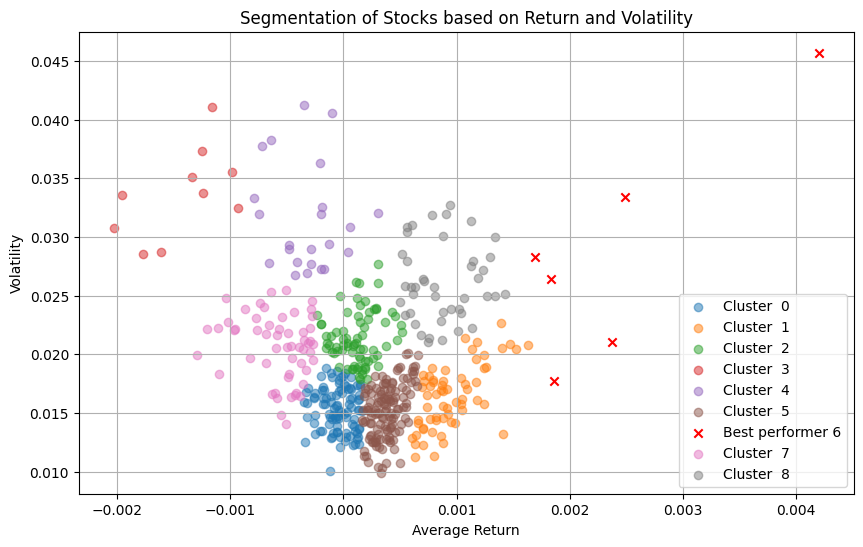

In [327]:
port.create_portfolio(Create_Kmeans_Portfolio)

Selected Stocks with Highest Return/Risk Ratio:
1


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


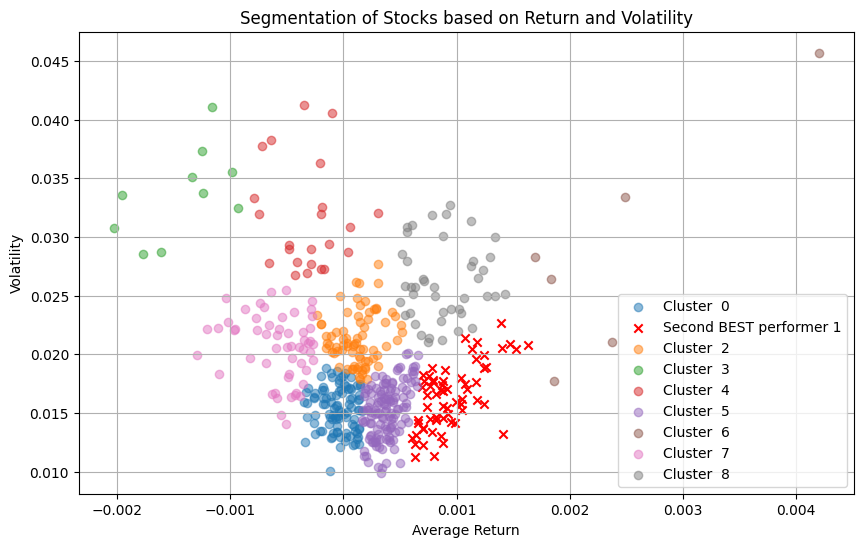

In [329]:
port.create_portfolio(Create_Kmeans_Portfolio_Second_Best)

In [330]:
port.create_portfolio(Create_More_Risky_Peformers_Portfolio)


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [331]:
port.create_portfolio(Create_Best_Peformers_Portfolio)

/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Portfolio 1 weighted return: 59.88834865713352
Create_Kmeans_Portfolio
Portfolio Name: Create_Kmeans_Portfolio
Average Return Rate: 0.24%
Sharpe Ratio: -1.16
Weights per Symbol:
ANET: 3.00%
LLY: 44.00%
NVDA: 1.00%
SMCI: 12.00%
VST: 41.00%


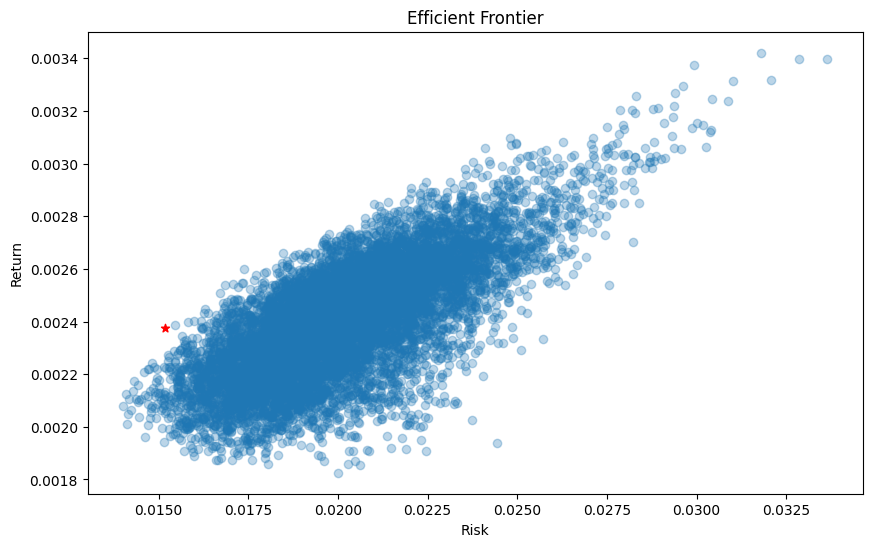

Portfolio 2 weighted return: 30.895205530983432
Create_Kmeans_Portfolio_Second_Best
Portfolio Name: Create_Kmeans_Portfolio_Second_Best
Average Return Rate: 0.12%
Sharpe Ratio: -2.09
Weights per Symbol:
ABBV: 1.00%
ACGL: 4.00%
AVGO: 11.00%
CBOE: 3.00%
CMG: 3.00%
COST: 1.00%
FICO: 4.00%
GE: 1.00%
HWM: 1.00%
IRM: 1.00%
MCK: 32.00%
MPC: 7.00%
MRK: 15.00%
NRG: 3.00%
PGR: 3.00%
PWR: 1.00%
REGN: 1.00%
RSG: 3.00%
WAB: 1.00%
XOM: 2.00%


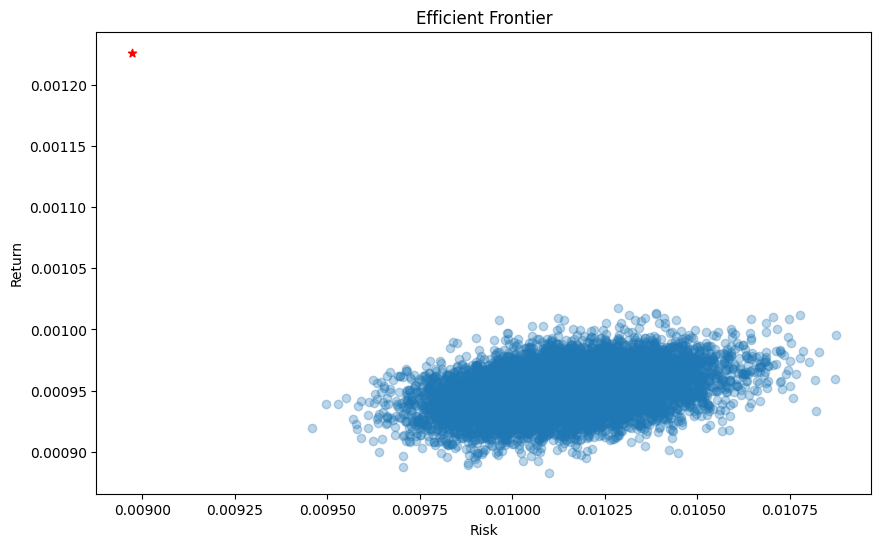

Portfolio 3 weighted return: 83.08007098187802
Create_More_Risky_Peformers_Portfolio
Portfolio Name: Create_More_Risky_Peformers_Portfolio
Average Return Rate: 0.33%
Sharpe Ratio: -0.48
Weights per Symbol:
SMCI: 64.00%
BLDR: 36.00%


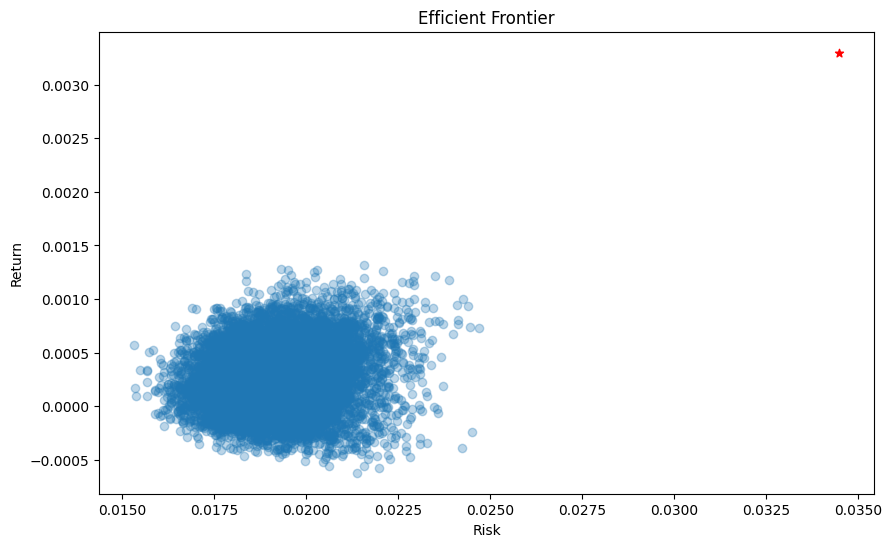

Portfolio 4 weighted return: 49.40314008684103
Create_Best_Peformers_Portfolio
Portfolio Name: Create_Best_Peformers_Portfolio
Average Return Rate: 0.20%
Sharpe Ratio: -1.09
Weights per Symbol:
VST: 66.00%
GE: 18.00%
WAB: 16.00%


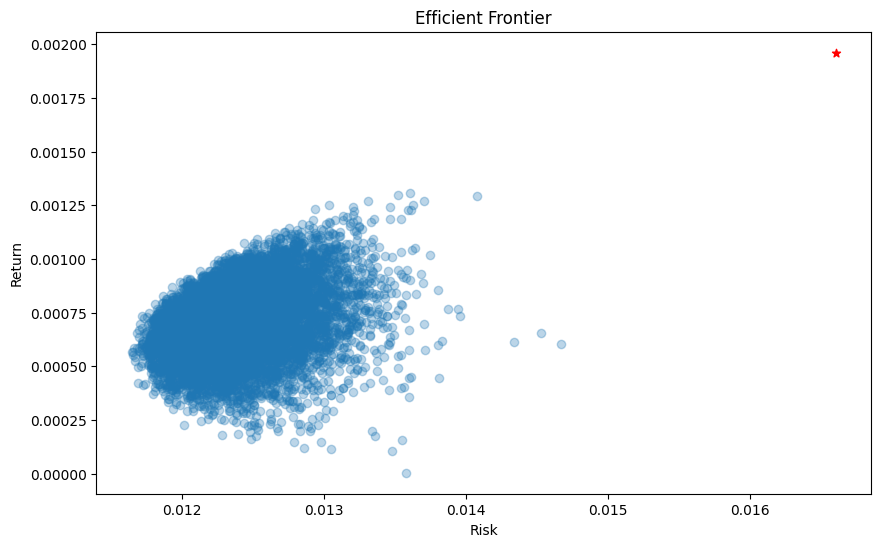

Market
5.842864689448504


In [332]:
port.print_portfolio_returns()

Create_Kmeans_Portfolio
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Kmeans_Portfolio - Sum of Weighted Returns: 0.08
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0   ANET       256.559998        314.029999    0.03  22.400219   
2    LLY       781.099976        760.000000    0.44  -2.701316   
3   NVDA       864.020020        898.780029    0.01   4.023056   
4   SMCI       858.799988        798.500000    0.12  -7.021424   
5    VST        75.839996         93.419998    0.41  23.180383   

   Weighted Return  
0         0.006720  
2        -0.011886  
3         0.000402  
4        -0.008426  
5         0.095040  


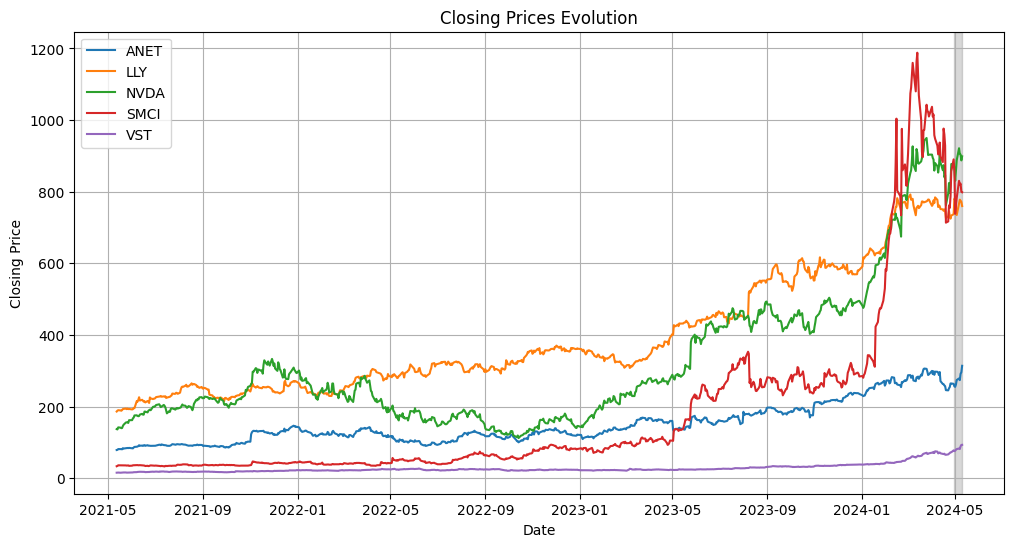

Create_Kmeans_Portfolio_Second_Best
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Kmeans_Portfolio_Second_Best - Sum of Weighted Returns: 0.04
   Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0    ABBV       162.639999        160.750000    0.01  -1.162075   
1    ACGL        93.540001        100.050003    0.04   6.959592   
7    AVGO      1300.270020       1332.800049    0.11   2.501790   
13   CBOE       181.149994        181.059998    0.03  -0.049681   
15    CMG      3159.600098       3239.229980    0.03   2.520252   
18   COST       722.900024        787.190002    0.01   8.893343   
23   FICO      1133.329956       1328.609985    0.04  17.230642   
25     GE       161.820007        163.380005    0.01   0.964033   
30    HWM        66.750000         80.870003    0.01  21.153562   
32    IRM        77.519997         79.769997    0.01   2.902477   
35    MCK       537.210022        559.909973    0.32   4.225526   
38    MPC       181.720001

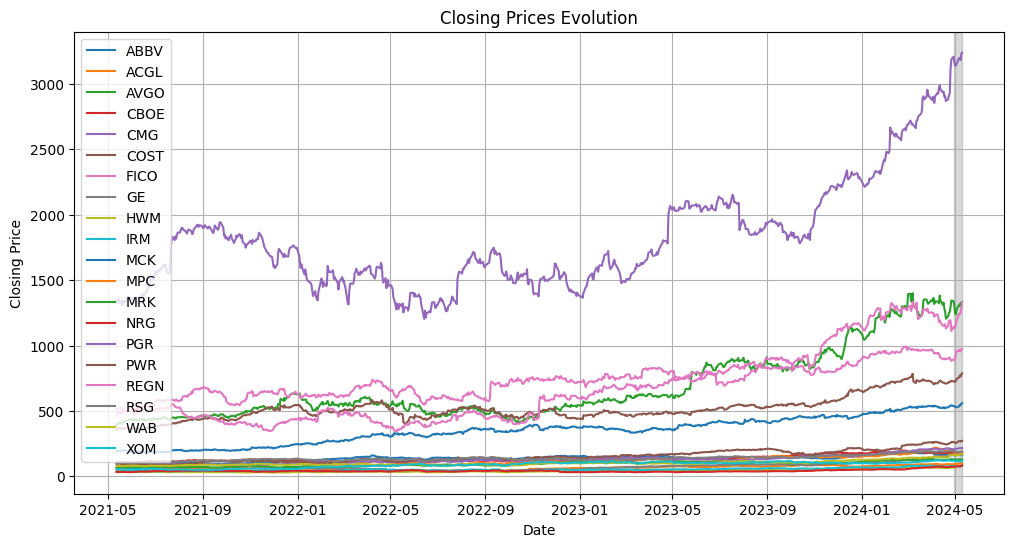

Create_More_Risky_Peformers_Portfolio
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_More_Risky_Peformers_Portfolio - Sum of Weighted Returns: -0.08
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
1   SMCI       858.799988        798.500000    0.64 -7.021424        -0.044937
4   BLDR       182.820007        166.960007    0.36 -8.675200        -0.031231


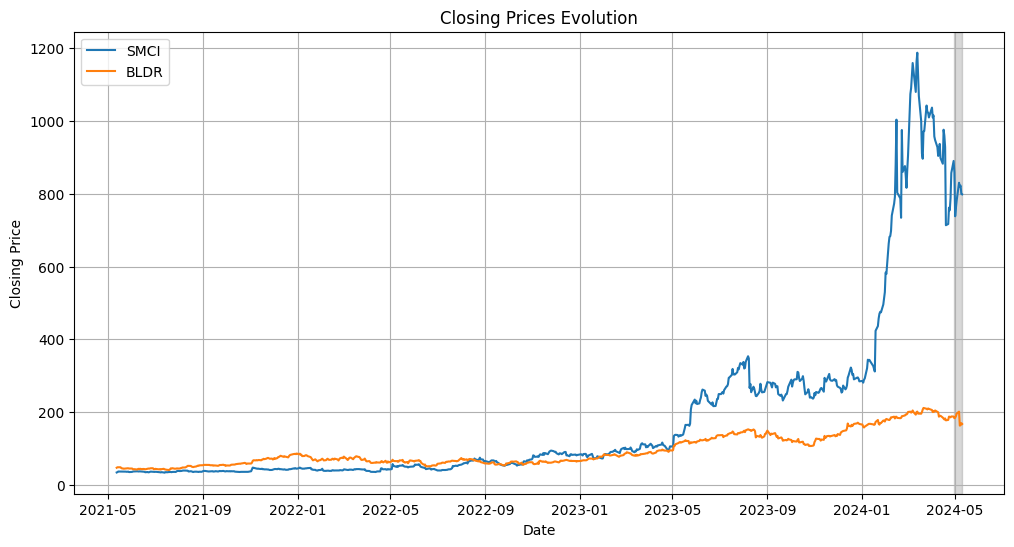

Create_Best_Peformers_Portfolio
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Best_Peformers_Portfolio - Sum of Weighted Returns: 0.16
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0    VST        75.839996         93.419998    0.66  23.180383   
4     GE       161.820007        163.380005    0.18   0.964033   
5    WAB       161.080002        168.339996    0.16   4.507074   

   Weighted Return  
0         0.152991  
4         0.001735  
5         0.007211  


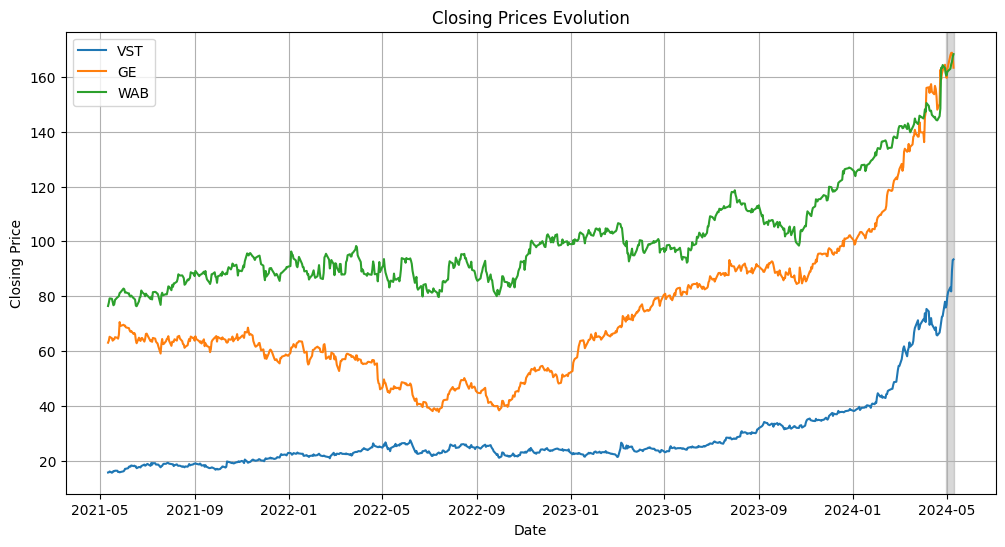

In [333]:
port.print_stock_return_details()

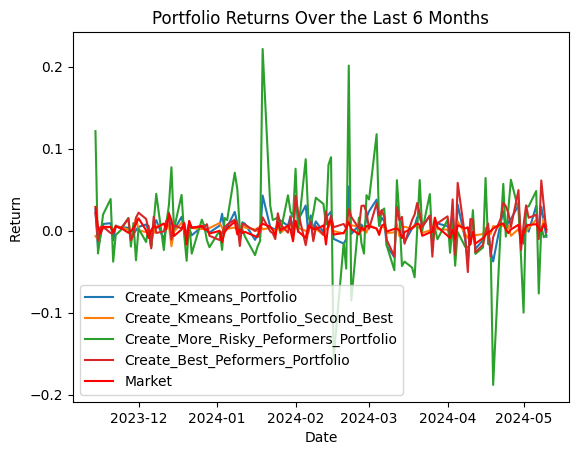

In [129]:
port.plot_6_month_returns()

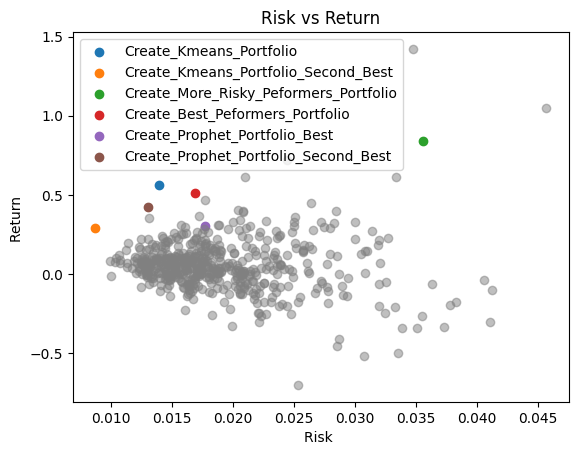

In [178]:
port.plot_risk_vs_return()


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


0.0022335168592059608
0.0010794410045316138
0.0033454694279165423


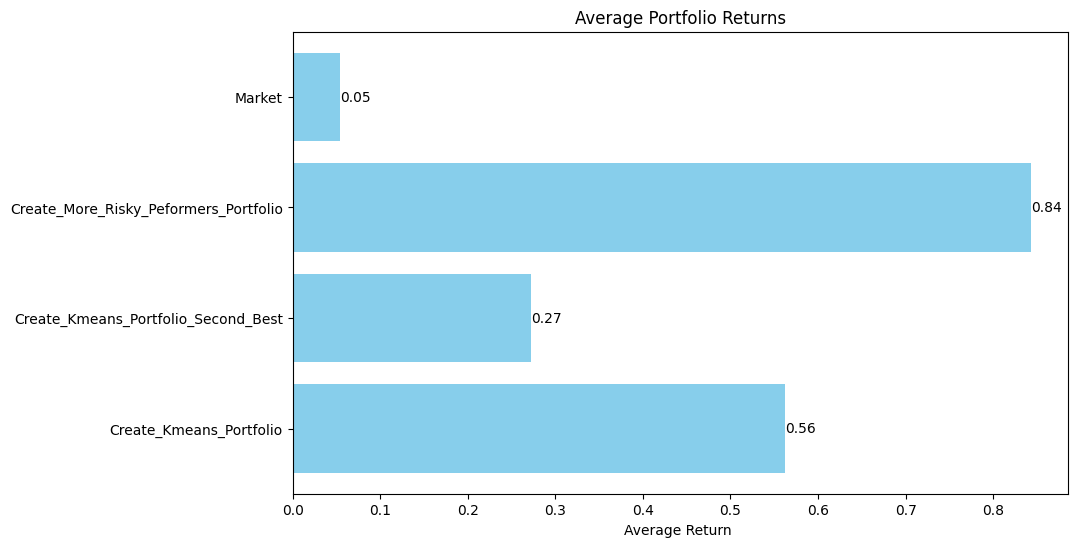

In [125]:
port.plot_avg_portfolio_returns()

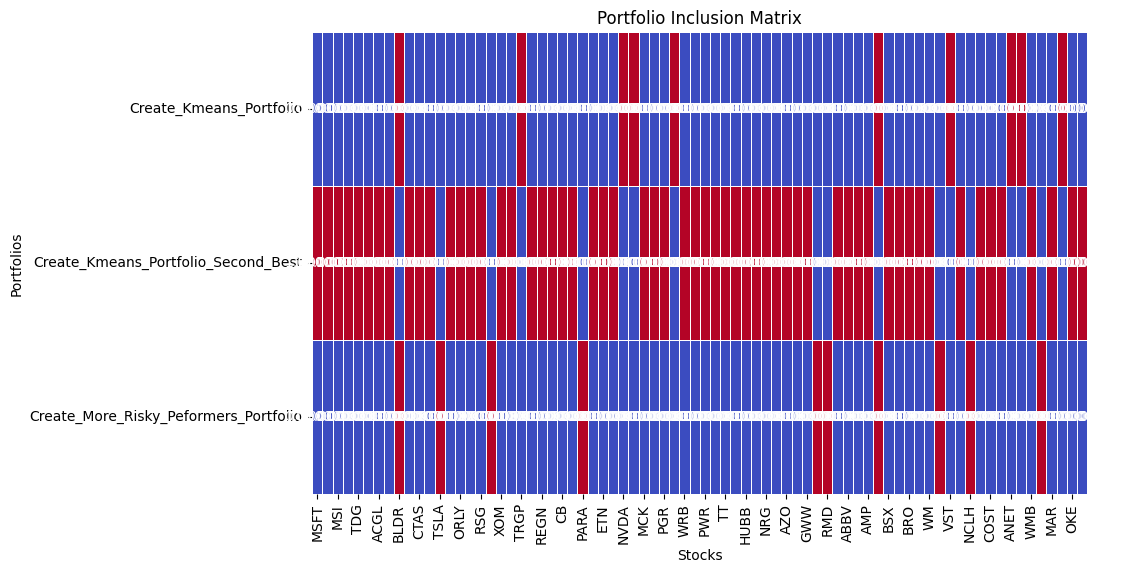

In [126]:
port.plot_portfolio_matrix()

In [176]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
def Create_Prophet_Portfolio_Second_Best(market_data):
# Assuming you have returns DataFrame and today's date is obtained
    today = datetime.today()
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))

# Reset index and rename columns
    returns.reset_index(inplace=True)
    returns.columns = ['ds'] + returns.columns[1:].tolist()
    

# Create DataFrame to store projected returns
    future_date = today + pd.DateOffset(years=3)
    projected_returns = pd.DataFrame({'ds': pd.date_range(start=today, end=future_date)})

# Dictionary to store symbol-wise growth
    symbol_growth = {}

# Iterate over each symbol column
    for column in returns.columns[1:]:
    # Train Prophet model
        model = Prophet()
        prophet_df = returns[['ds', column]].rename(columns={column: 'y'})
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Extract projected returns
        projected_return_90_days = forecast.iloc[-1]['yhat']  # Return at the end of 90 days
        current_return = returns.iloc[-1][column]  # Return at the current date

    # Calculate growth
        growth = projected_return_90_days - current_return
        symbol_growth[column] = growth

# Sort symbols by growth and select the top ones
    selected_symbols = sorted(symbol_growth, key=symbol_growth.get, reverse=True)[11:20]  # Select top 10 symbols
    print("Symbols with the best growth according to the projections:")
    print(selected_symbols)
    retVal = Portfolio(market_data[selected_symbols],selected_symbols)
    for symbol in selected_symbols:
    # Train Prophet model
        model = Prophet()
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Plot historical and projected values
        plt.figure(figsize=(10, 6))
        plt.plot(returns['ds'], returns[symbol], label='Historical', color='blue')
        plt.plot(forecast['ds'], forecast['yhat'], label='Projected', color='orange')
        plt.title(f'{symbol} - Total Projected Growth: {symbol_growth[symbol]:.2%}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return retVal
def Create_Prophet_Portfolio_Best(market_data):
# Assuming you have returns DataFrame and today's date is obtained
    today = datetime.today()
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))

# Reset index and rename columns
    returns.reset_index(inplace=True)
    returns.columns = ['ds'] + returns.columns[1:].tolist()
    

# Create DataFrame to store projected returns
    future_date = today + pd.DateOffset(years=3)
    projected_returns = pd.DataFrame({'ds': pd.date_range(start=today, end=future_date)})

# Dictionary to store symbol-wise growth
    symbol_growth = {}

# Iterate over each symbol column
    for column in returns.columns[1:]:
    # Train Prophet model
        model = Prophet()
        prophet_df = returns[['ds', column]].rename(columns={column: 'y'})
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Extract projected returns
        projected_return_90_days = forecast.iloc[-1]['yhat']  # Return at the end of 90 days
        current_return = returns.iloc[-1][column]  # Return at the current date

    # Calculate growth
        growth = projected_return_90_days - current_return
        symbol_growth[column] = growth

# Sort symbols by growth and select the top ones
    selected_symbols = sorted(symbol_growth, key=symbol_growth.get, reverse=True)[:10]  # Select top 10 symbols
    print("Symbols with the best growth according to the projections:")
    print(selected_symbols)
    retVal = Portfolio(market_data[selected_symbols],selected_symbols)
    for symbol in selected_symbols:
    # Train Prophet model
        model = Prophet()
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Plot historical and projected values
        plt.figure(figsize=(10, 6))
        plt.plot(returns['ds'], returns[symbol], label='Historical', color='blue')
        plt.plot(forecast['ds'], forecast['yhat'], label='Projected', color='orange')
        plt.title(f'{symbol} - Total Projected Growth: {symbol_growth[symbol]:.2%}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return retVal

In [334]:
port.create_portfolio(Create_Prophet_Portfolio_Best)

10:56:27 - cmdstanpy - INFO - Chain [1] start processing
10:56:28 - cmdstanpy - INFO - Chain [1] done processing
10:56:28 - cmdstanpy - INFO - Chain [1] start processing
10:56:28 - cmdstanpy - INFO - Chain [1] done processing
10:56:29 - cmdstanpy - INFO - Chain [1] start processing
10:56:29 - cmdstanpy - INFO - Chain [1] done processing
10:56:29 - cmdstanpy - INFO - Chain [1] start processing
10:56:29 - cmdstanpy - INFO - Chain [1] done processing
10:56:29 - cmdstanpy - INFO - Chain [1] start processing
10:56:29 - cmdstanpy - INFO - Chain [1] done processing
10:56:30 - cmdstanpy - INFO - Chain [1] start processing
10:56:30 - cmdstanpy - INFO - Chain [1] done processing
10:56:30 - cmdstanpy - INFO - Chain [1] start processing
10:56:30 - cmdstanpy - INFO - Chain [1] done processing
10:56:31 - cmdstanpy - INFO - Chain [1] start processing
10:56:31 - cmdstanpy - INFO - Chain [1] done processing
10:56:31 - cmdstanpy - INFO - Chain [1] start processing
10:56:31 - cmdstanpy - INFO - Chain [1]

23:06:23 - cmdstanpy - INFO - Chain [1] start processing
23:06:23 - cmdstanpy - INFO - Chain [1] done processing
23:06:23 - cmdstanpy - INFO - Chain [1] start processing
23:06:23 - cmdstanpy - INFO - Chain [1] done processing
23:06:24 - cmdstanpy - INFO - Chain [1] start processing
23:06:24 - cmdstanpy - INFO - Chain [1] done processing
23:06:24 - cmdstanpy - INFO - Chain [1] start processing
23:06:24 - cmdstanpy - INFO - Chain [1] done processing
23:06:25 - cmdstanpy - INFO - Chain [1] start processing
23:06:25 - cmdstanpy - INFO - Chain [1] done processing
23:06:25 - cmdstanpy - INFO - Chain [1] start processing
23:06:25 - cmdstanpy - INFO - Chain [1] done processing
23:06:25 - cmdstanpy - INFO - Chain [1] start processing
23:06:25 - cmdstanpy - INFO - Chain [1] done processing
23:06:26 - cmdstanpy - INFO - Chain [1] start processing
23:06:26 - cmdstanpy - INFO - Chain [1] done processing
23:06:26 - cmdstanpy - INFO - Chain [1] start processing
23:06:26 - cmdstanpy - INFO - Chain [1]

Symbols with the best growth according to the projections:
['NKE', 'CME', 'MPC', 'GPN', 'PYPL', 'FSLR', 'EQIX', 'DECK', 'LLY']


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
23:09:56 - cmdstanpy - INFO - Chain [1] start processing
23:09:56 - cmdstanpy - INFO - Chain [1] done processing


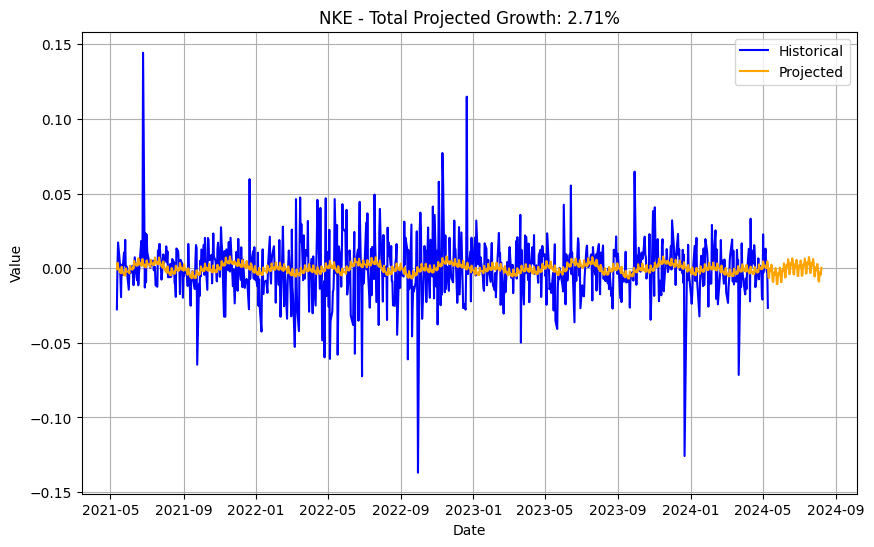

23:09:57 - cmdstanpy - INFO - Chain [1] start processing
23:09:57 - cmdstanpy - INFO - Chain [1] done processing


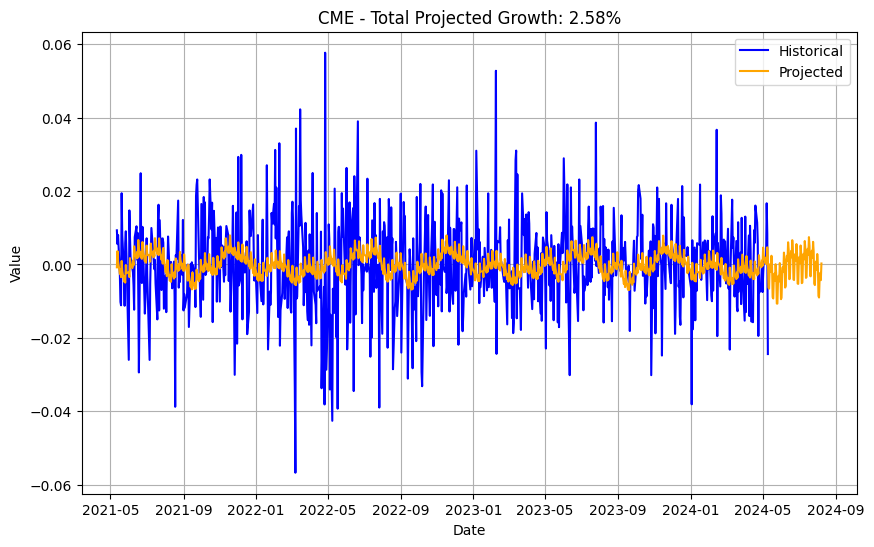

23:09:57 - cmdstanpy - INFO - Chain [1] start processing
23:09:57 - cmdstanpy - INFO - Chain [1] done processing


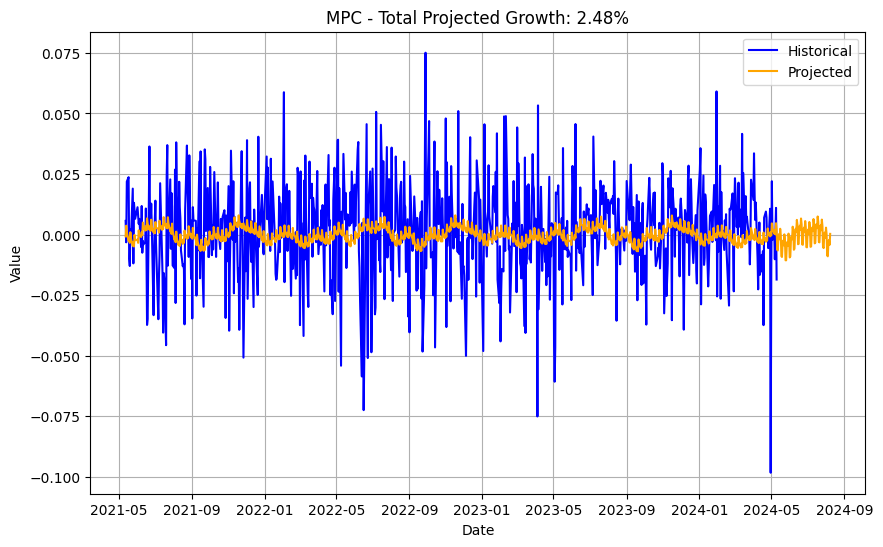

23:09:58 - cmdstanpy - INFO - Chain [1] start processing
23:09:58 - cmdstanpy - INFO - Chain [1] done processing


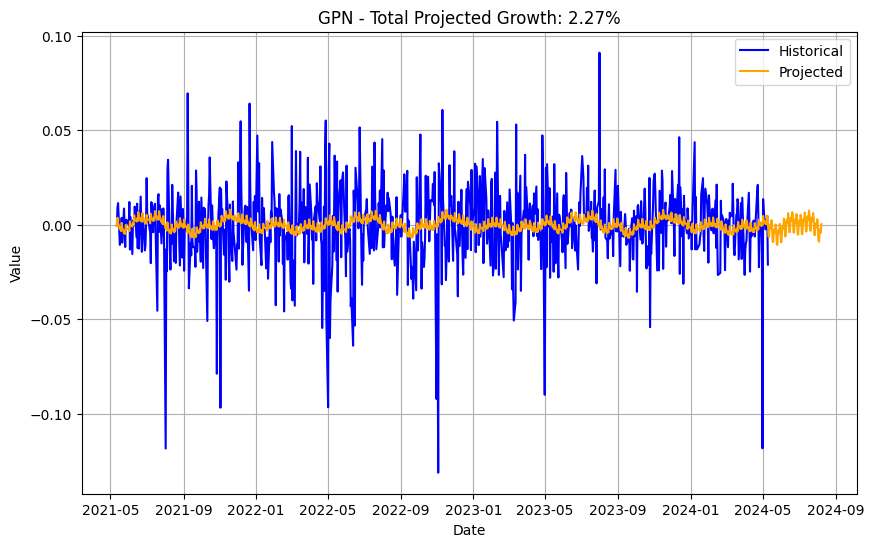

23:09:59 - cmdstanpy - INFO - Chain [1] start processing
23:09:59 - cmdstanpy - INFO - Chain [1] done processing


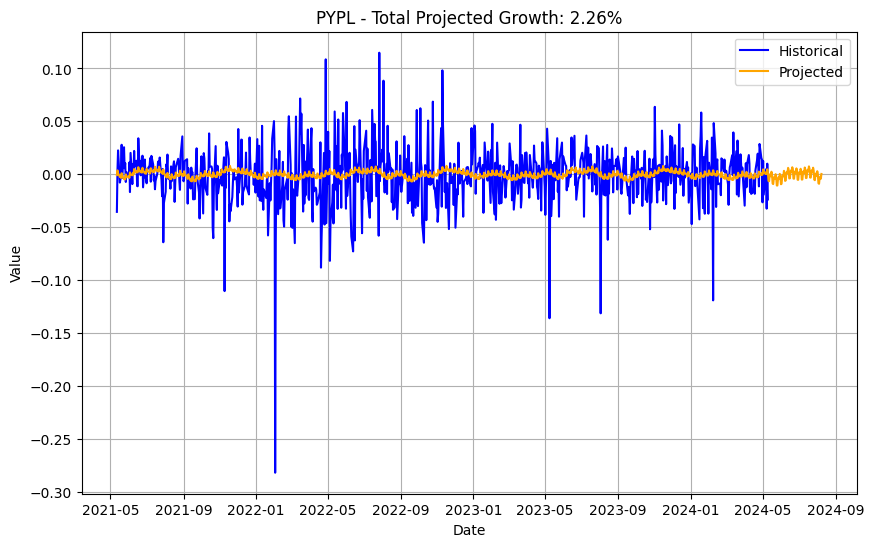

23:09:59 - cmdstanpy - INFO - Chain [1] start processing
23:09:59 - cmdstanpy - INFO - Chain [1] done processing


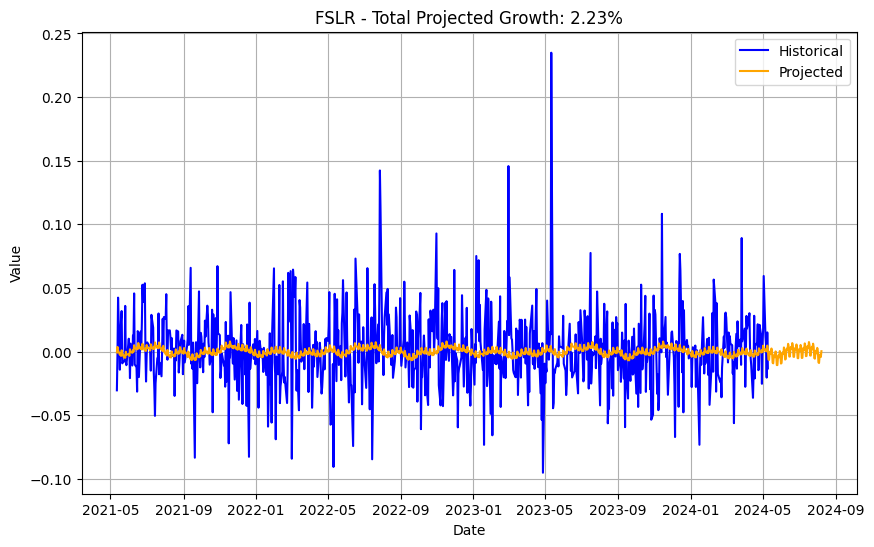

23:10:00 - cmdstanpy - INFO - Chain [1] start processing
23:10:00 - cmdstanpy - INFO - Chain [1] done processing


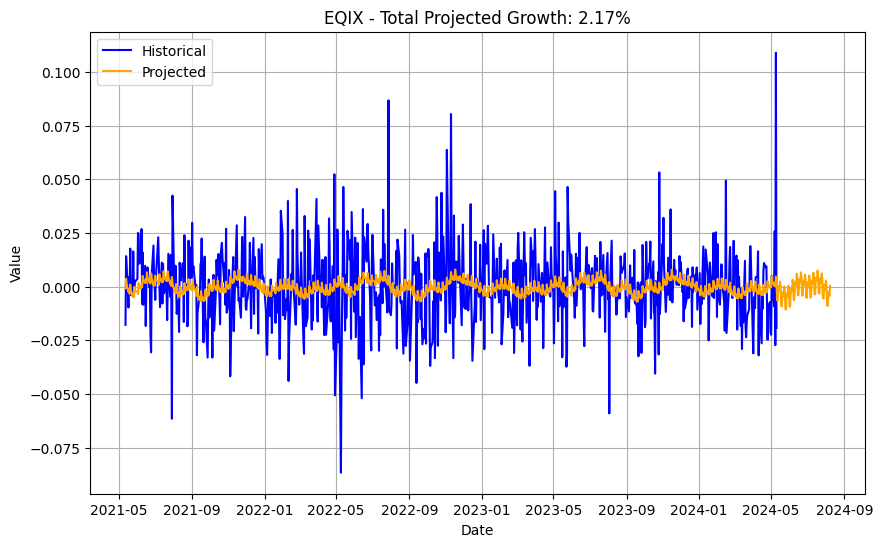

23:10:01 - cmdstanpy - INFO - Chain [1] start processing
23:10:01 - cmdstanpy - INFO - Chain [1] done processing


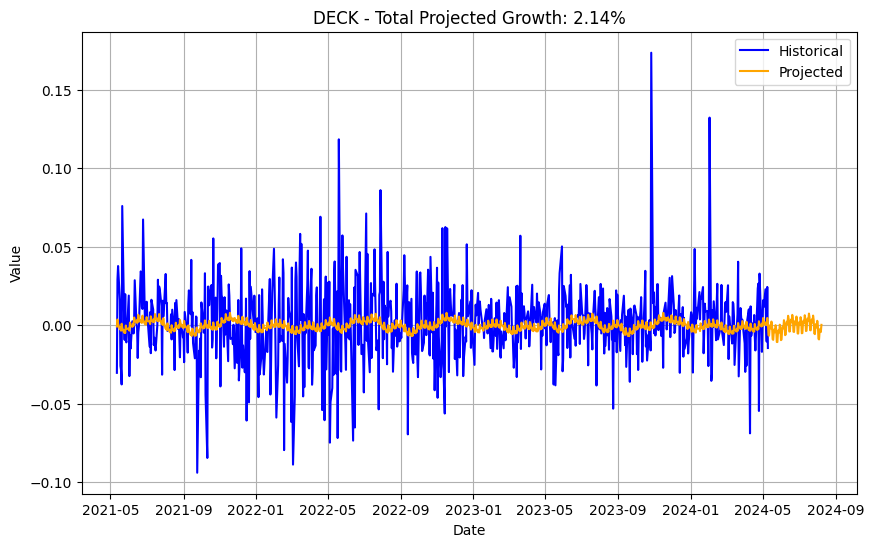

23:10:01 - cmdstanpy - INFO - Chain [1] start processing
23:10:01 - cmdstanpy - INFO - Chain [1] done processing


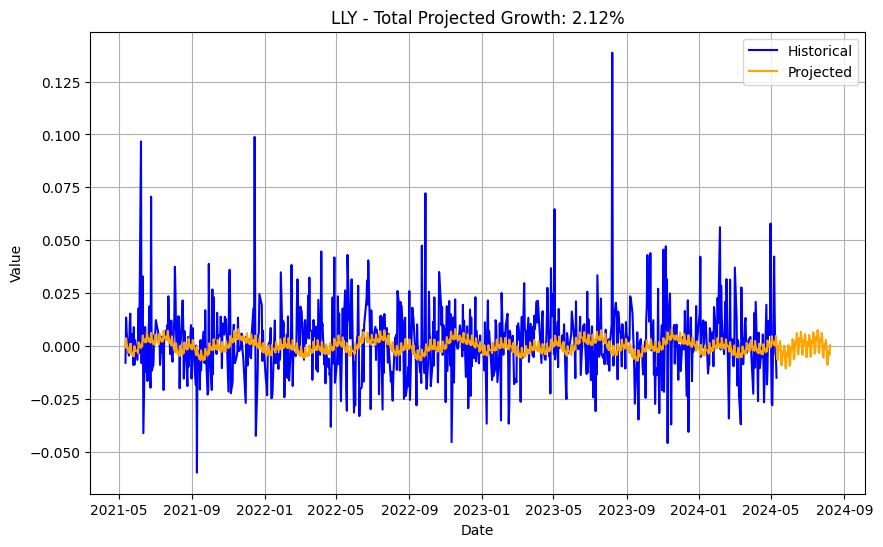

In [ ]:
port.create_portfolio(Create_Prophet_Portfolio_Second_Best)

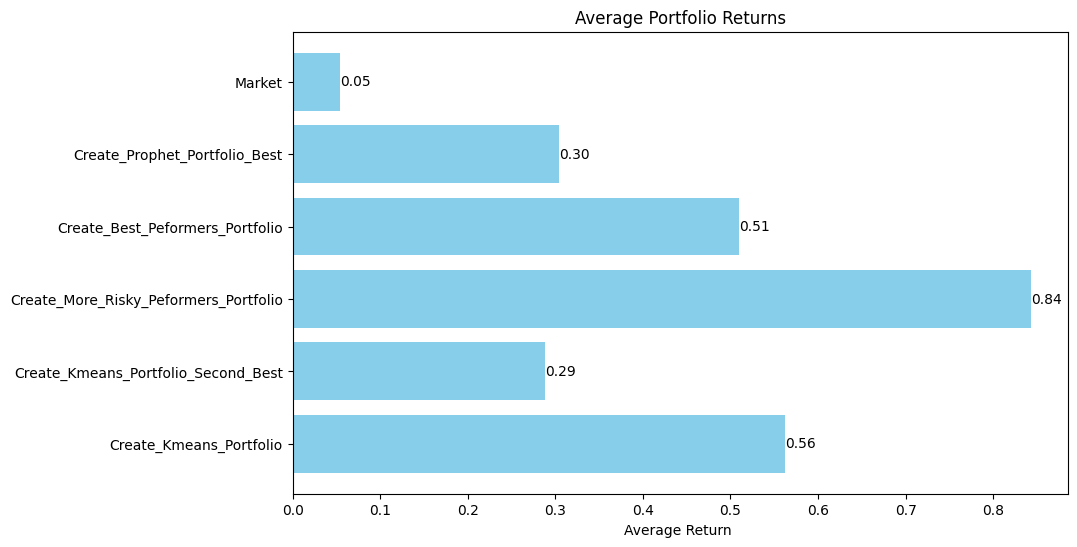

In [174]:
port.plot_avg_portfolio_returns()


In [ ]:
port.print_stock_return_details()